In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the anonymized dataset
df = pd.read_csv('linkedin_connections_anonymized_public.csv')

# Preview the first rows and columns
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Connected On            557 non-null    object
 1   Company Employee Range  336 non-null    object
 2   Location                557 non-null    object
 3   Person_ID               557 non-null    object
 4   Company_Anon            536 non-null    object
 5   Industry_Anon           546 non-null    object
 6   Function                557 non-null    object
dtypes: object(7)
memory usage: 30.6+ KB
None
  Connected On Company Employee Range                            Location  \
0  16 Jan 2025             201 to 500       Houston, Texas, United States   
1  13 Jan 2025          5001 to 10000         Dallas-Fort Worth Metroplex   
2  12 Jan 2025                    NaN  Swakopmund, Erongo Region, Namibia   
3  10 Jan 2025                    NaN       Houston, Texas, United States 

In [6]:
#Date formatting
df['Connected On'] = pd.to_datetime(df['Connected On'], errors='coerce')
print(df['Connected On'].dtypes)
print(df['Connected On'].head())


datetime64[ns]
0   2025-01-16
1   2025-01-13
2   2025-01-12
3   2025-01-10
4   2025-01-10
Name: Connected On, dtype: datetime64[ns]


In [8]:
print(df['Location'].nunique())
print(df['Location'].value_counts().head(20))
print(df['Location'].unique()[:30])  # Preview first 30 unique values


277
Location
Moscow, Moscow City, Russia                        59
Russia                                             44
Kazakhstan                                         18
Zambia                                             11
New York, New York, United States                  11
Houston, Texas, United States                      10
United Arab Emirates                                9
United States                                       8
London, England, United Kingdom                     8
Greater Paris Metropolitan Region                   6
Dubai, United Arab Emirates                         6
Ukraine                                             6
Tanzania                                            6
City of Johannesburg, Gauteng, South Africa         6
Israel                                              6
United Kingdom                                      5
Paris, Île-de-France, France                        5
Almaty, Kazakhstan                                  5
Washington, Dis

In [14]:
# Extract country name  (Last Comma-Separated Value or Whole String)
def extract_country(location):
    if pd.isnull(location):
        return np.nan
    # Split by comma and strip spaces
    parts = [x.strip() for x in location.split(',')]
    return parts[-1] if len(parts) > 1 else parts[0]

df['Country'] = df['Location'].apply(extract_country)
df[['Location', 'Country']].head(10)

,Location,Country
0,"Houston, Texas, United States",United States
1,Dallas-Fort Worth Metroplex,Dallas-Fort Worth Metroplex
2,"Swakopmund, Erongo Region, Namibia",Namibia
3,"Houston, Texas, United States",United States
4,"Almaty, Kazakhstan",Kazakhstan
5,"Stoughton, England, United Kingdom",United Kingdom
6,"Houston, Texas, United States",United States
7,"City of Johannesburg, Gauteng, South Africa",South Africa
8,Mozambique,Mozambique
9,Tanzania,Tanzania


In [18]:
# Identify and Map "Metropolitan Area" or Other Non-Country Values
country_counts = df['Country'].value_counts()
# Export for manual mapping
country_counts.to_csv('unique_countries_to_map.csv')

In [20]:
country_corrections = {
    'Atlanta Metropolitan Area': 'United States',
    'Basel Metropolitan Area': 'Switzerland',
    'Berlin Metropolitan Area': 'Germany',
    'Dallas-Fort Worth Metroplex': 'United States',
    'Denver Metropolitan Area': 'United States',
    'Des Moines Metropolitan Area': 'United States',
    'Frankfurt Rhine-Main Metropolitan Area': 'Germany',
    'Greater Barcelona Metropolitan Area': 'Spain',
    'Greater Boston': 'United States',
    'Greater Chennai Area': 'India',
    'Greater Exeter Area': 'United Kingdom',
    'Greater Houston': 'United States',
    'Greater Madrid Metropolitan Area': 'Spain',
    'Greater Málaga Metropolitan Area': 'Spain',
    'Greater Paris Metropolitan Region': 'France',
    'Greater Phoenix Area': 'United States',
    'Greater Tokyo Area': 'Japan',
    'Greater Toulouse Metropolitan Area': 'France',
    'Los Angeles Metropolitan Area': 'United States',
    'Moscow Metropolitan Area': 'Russia',
    'Nashville Metropolitan Area': 'United States',
    'New York City Metropolitan Area': 'United States',
    'Peoria Metropolitan Area': 'United States',
    'Saint Petersburg Metropolitan Area': 'Russia',
    'Salt Lake City Metropolitan Area': 'United States',
    'San Francisco Bay Area': 'United States',
    'Youngstown-Warren area': 'United States'
}

df['Country'] = df['Country'].replace(country_corrections)
df[['Location', 'Country']].head(20)

,Location,Country
0,"Houston, Texas, United States",United States
1,Dallas-Fort Worth Metroplex,United States
2,"Swakopmund, Erongo Region, Namibia",Namibia
3,"Houston, Texas, United States",United States
4,"Almaty, Kazakhstan",Kazakhstan
5,"Stoughton, England, United Kingdom",United Kingdom
6,"Houston, Texas, United States",United States
7,"City of Johannesburg, Gauteng, South Africa",South Africa
8,Mozambique,Mozambique
9,Tanzania,Tanzania


In [162]:
df.to_csv('linkedin_connections_cleaned.csv', index=False)
df.describe(include='all')

,Connected On,Company Employee Range,Location,Person_ID,Company_Anon,Industry_Anon,Function,Country,YearMonth,Country_Grouped
count,557,336,557,557,536,546,557,557,557,557
unique,NaN,9,277,545,439,20,17,71,122,11
top,NaN,10001+,"Moscow, Moscow City, Russia",Person_195,Freelance,Focus_Industry_2,Management,United States,2024-12,Other
freq,NaN,117,59,4,32,68,215,130,28,161
mean,2018-09-28 20:40:56.014362624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2011-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2015-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017-10-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-04-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2025-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
#Color definition for the graphics
industry_colors = {
    'Focus_Industry_1': '#332288',
    'Focus_Industry_2': '#117733',
    'Focus_Industry_3': '#DDCC77',
    'Focus_Industry_4': '#CC6677',
    'Other': '#999999'
}

# For time periods
all_time_color = '#4477AA'
y2024_color = '#EE7733'

#Font definition
plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 12 

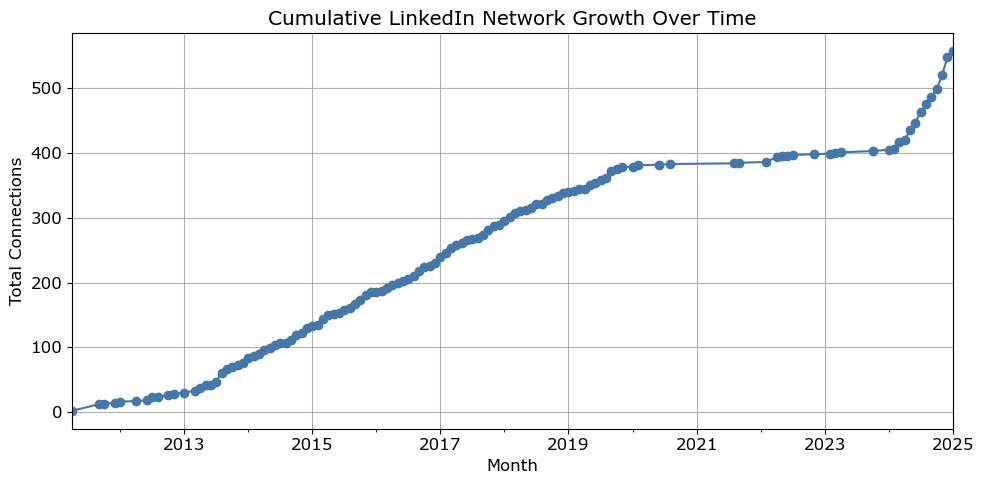

In [158]:
# Network growth over time
df['YearMonth'] = df['Connected On'].dt.to_period('M') #extract month for grouping
growth = df.groupby('YearMonth').size().cumsum() # calculate cumulative connections over time

#Plot cumulative network growth

growth.plot(figsize=(10,5), color=all_time_color, marker='o')
plt.title('Cumulative LinkedIn Network Growth Over Time')
plt.xlabel('Month')
plt.ylabel('Total Connections')
plt.grid(True)
plt.tight_layout()
plt.savefig('Cumulative Growth plot.jpeg', format='jpeg', dpi=300)
plt.show()

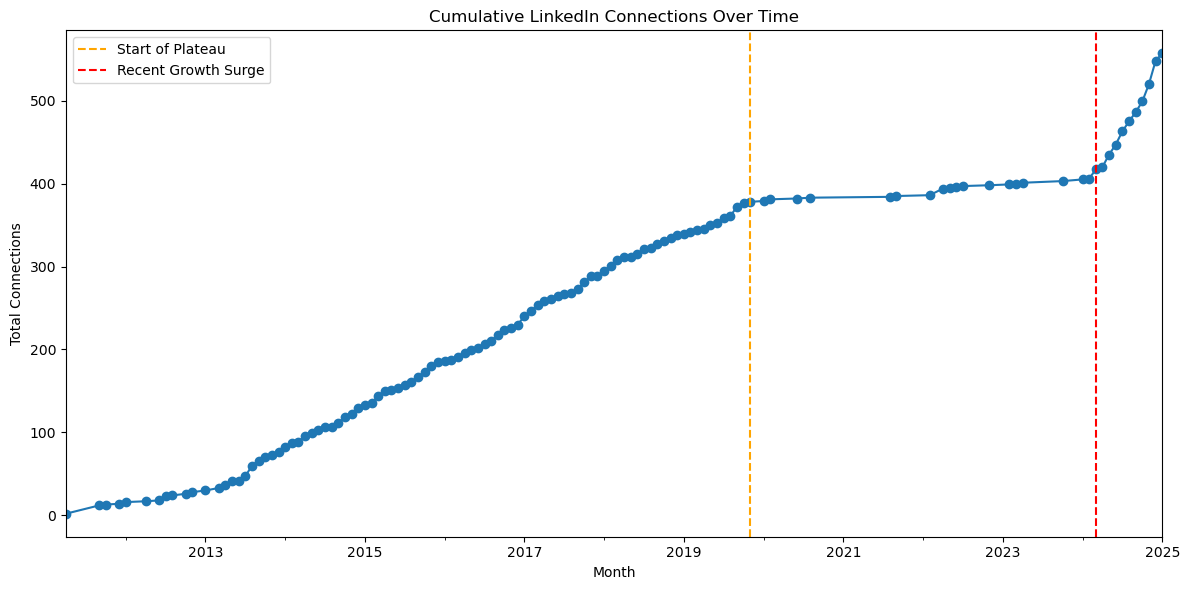

In [30]:
# Annotated plot - Growth phases.
plt.figure(figsize=(12, 6))
growth.plot(marker='o')
plt.title('Cumulative LinkedIn Connections Over Time')
plt.xlabel('Month')
plt.ylabel('Total Connections')

# Highlight phases
plt.axvline(pd.Period('2019-11'), color='orange', linestyle='--', label='Start of Plateau')
plt.axvline(pd.Period('2024-03'), color='red', linestyle='--', label='Recent Growth Surge')
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
#Geographical distribution
country_counts = df['Country'].value_counts()
print(country_counts.head(20))

Country
United States           130
Russia                  122
Kazakhstan               27
United Kingdom           23
France                   23
Zambia                   19
United Arab Emirates     16
Israel                   14
Germany                  11
Italy                    11
Switzerland              11
South Africa              9
Tanzania                  9
Australia                 9
India                     8
Canada                    8
Ukraine                   7
China                     7
Ghana                     5
Latvia                    4
Name: count, dtype: int64


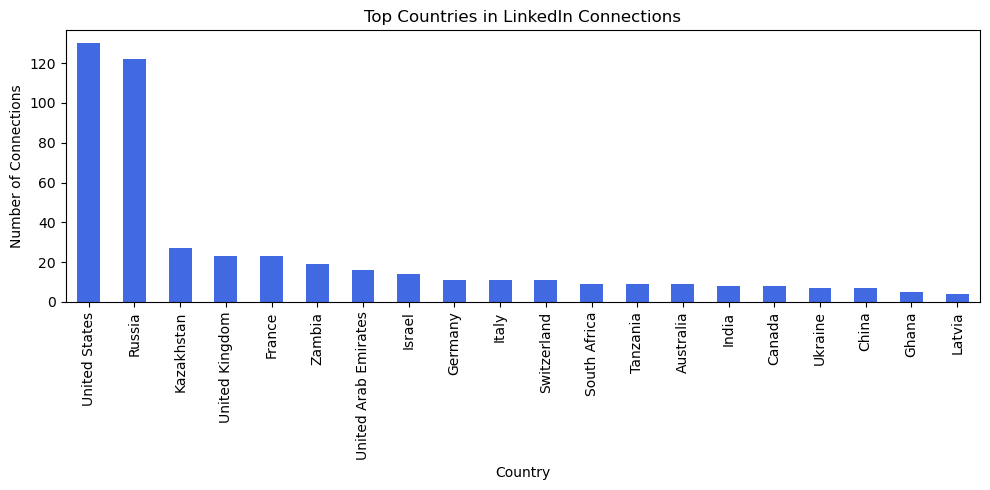

In [34]:
#Top 20 countries represented
top_countries = country_counts.head(20)

top_countries.plot(kind='bar', figsize=(10,5), color='royalblue')
plt.title('Top Countries in LinkedIn Connections')
plt.xlabel('Country')
plt.ylabel('Number of Connections')
plt.tight_layout()
plt.show()

In [40]:
# Monthly new connections by country over the past year 

# Filter for connections from Jan 2024 to Jan 2025 (inclusive)
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2025-01-31')
df_recent = df[(df['Connected On'] >= start_date) & (df['Connected On'] <= end_date)].copy()
df_recent.head(20)


,Connected On,Company Employee Range,Location,Person_ID,Company_Anon,Industry_Anon,Function,Country,YearMonth,Country_Grouped
0,2025-01-16,201 to 500,"Houston, Texas, United States",Person_001,Company_255,Focus_Industry_1,Procurement/Supply Chain,United States,2025-01,United States
1,2025-01-13,5001 to 10000,Dallas-Fort Worth Metroplex,Person_002,Company_141,Industry_15,Management,United States,2025-01,United States
2,2025-01-12,NaN,"Swakopmund, Erongo Region, Namibia",Person_003,Company_163,Focus_Industry_2,Engineering/Technical/Science,Namibia,2025-01,Other
3,2025-01-10,NaN,"Houston, Texas, United States",Person_004,Freelance,Industry_14,Freelance,United States,2025-01,United States
4,2025-01-10,1001 to 5000,"Almaty, Kazakhstan",Person_005,Company_001,Industry_03,Management,Kazakhstan,2025-01,Kazakhstan
5,2025-01-09,NaN,"Stoughton, England, United Kingdom",Person_006,Company_074,Focus_Industry_3,Sales/Business Development,United Kingdom,2025-01,United Kingdom
6,2025-01-07,10001+,"Houston, Texas, United States",Person_007,Company_202,Focus_Industry_1,Procurement/Supply Chain,United States,2025-01,United States
7,2025-01-07,NaN,"City of Johannesburg, Gauteng, South Africa",Person_008,Company_269,Focus_Industry_2,Sales/Business Development,South Africa,2025-01,Other
8,2025-01-04,NaN,Mozambique,Person_009,Company_244,Industry_14,Management,Mozambique,2025-01,Other
9,2024-12-27,NaN,Tanzania,Person_010,Company_286,Focus_Industry_2,Consultant/Advisor/Coach,Tanzania,2024-12,Other


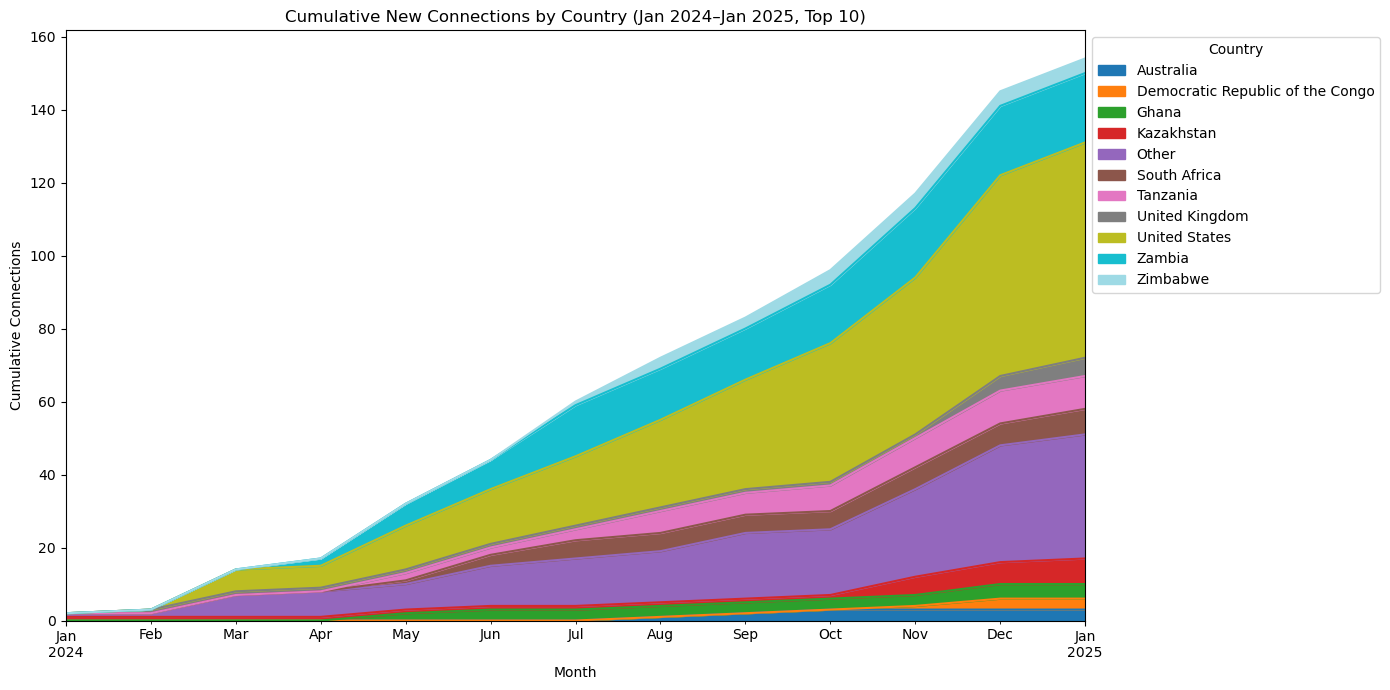

In [44]:
# Group by month and country
df_recent['YearMonth'] = df_recent['Connected On'].dt.to_period('M')
top_countries_recent = df_recent['Country'].value_counts().nlargest(10).index
df_recent['Country_Grouped'] = df_recent['Country'].apply(lambda x: x if x in top_countries_recent else 'Other')

# Monthly counts
area_data_recent = (
    df_recent.groupby(['YearMonth', 'Country_Grouped'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)
# Cumulative sums
cumulative_area_data_recent = area_data_recent.cumsum()

# Plot connections growth by country over the recent period
cumulative_area_data_recent.plot(
    kind='area', 
    stacked=True, 
    figsize=(14,7), 
    colormap='tab20'
)
plt.title('Cumulative New Connections by Country (Jan 2024–Jan 2025, Top 10)')
plt.xlabel('Month')
plt.ylabel('Cumulative Connections')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()



In [48]:
#Industry focus analysis
# Only keep rows where Industry_Anon is a focus industry
focus_industries = [f'Focus_Industry_{i}' for i in range(1, 5)]
df_focus = df[df['Industry_Anon'].isin(focus_industries)].copy()
df_focus.head()

,Connected On,Company Employee Range,Location,Person_ID,Company_Anon,Industry_Anon,Function,Country,YearMonth,Country_Grouped
0,2025-01-16,201 to 500,"Houston, Texas, United States",Person_001,Company_255,Focus_Industry_1,Procurement/Supply Chain,United States,2025-01,United States
2,2025-01-12,NaN,"Swakopmund, Erongo Region, Namibia",Person_003,Company_163,Focus_Industry_2,Engineering/Technical/Science,Namibia,2025-01,Other
5,2025-01-09,NaN,"Stoughton, England, United Kingdom",Person_006,Company_074,Focus_Industry_3,Sales/Business Development,United Kingdom,2025-01,United Kingdom
6,2025-01-07,10001+,"Houston, Texas, United States",Person_007,Company_202,Focus_Industry_1,Procurement/Supply Chain,United States,2025-01,United States
7,2025-01-07,NaN,"City of Johannesburg, Gauteng, South Africa",Person_008,Company_269,Focus_Industry_2,Sales/Business Development,South Africa,2025-01,Other


In [50]:
# Industry composition as of January 01, 2024
as_of_2024 = df_focus[df_focus['Connected On'] <= pd.Timestamp('2024-01-01')]
counts_2024 = as_of_2024['Industry_Anon'].value_counts().reindex(focus_industries, fill_value=0)
counts_2024

Industry_Anon
Focus_Industry_1    33
Focus_Industry_2    13
Focus_Industry_3    10
Focus_Industry_4    16
Name: count, dtype: int64

In [56]:
# Industry composition as of January 01, 2025
as_of_2025 = df_focus[df_focus['Connected On'] <= pd.Timestamp('2025-01-01')]
counts_2025 = as_of_2025['Industry_Anon'].value_counts().reindex(focus_industries, fill_value=0)
counts_2025

Industry_Anon
Focus_Industry_1    57
Focus_Industry_2    66
Focus_Industry_3    15
Focus_Industry_4    29
Name: count, dtype: int64

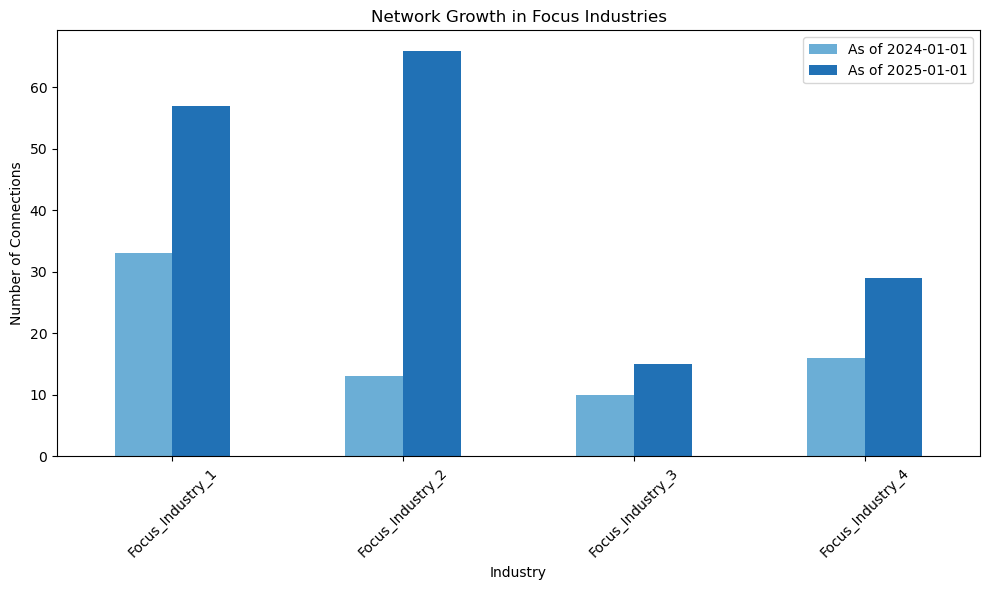

In [58]:
# Plot network growth in the focus industries in 2024
industry_growth = pd.DataFrame({
    'As of 2024-01-01': counts_2024,
    'As of 2025-01-01': counts_2025
})

industry_growth.plot(
    kind='bar',
    figsize=(10, 6),
    stacked=False,
    color=['#6baed6', '#2171b5']
)
plt.title('Network Growth in Focus Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Connections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
df_recent.info()


<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 489
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Connected On            154 non-null    datetime64[ns]
 1   Company Employee Range  117 non-null    object        
 2   Location                154 non-null    object        
 3   Person_ID               154 non-null    object        
 4   Company_Anon            153 non-null    object        
 5   Industry_Anon           154 non-null    object        
 6   Function                154 non-null    object        
 7   Country                 154 non-null    object        
 8   YearMonth               154 non-null    period[M]     
 9   Country_Grouped         154 non-null    object        
dtypes: datetime64[ns](1), object(8), period[M](1)
memory usage: 13.2+ KB


In [62]:
df_focus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 0 to 551
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Connected On            172 non-null    datetime64[ns]
 1   Company Employee Range  119 non-null    object        
 2   Location                172 non-null    object        
 3   Person_ID               172 non-null    object        
 4   Company_Anon            168 non-null    object        
 5   Industry_Anon           172 non-null    object        
 6   Function                172 non-null    object        
 7   Country                 172 non-null    object        
 8   YearMonth               172 non-null    period[M]     
 9   Country_Grouped         172 non-null    object        
dtypes: datetime64[ns](1), object(8), period[M](1)
memory usage: 14.8+ KB


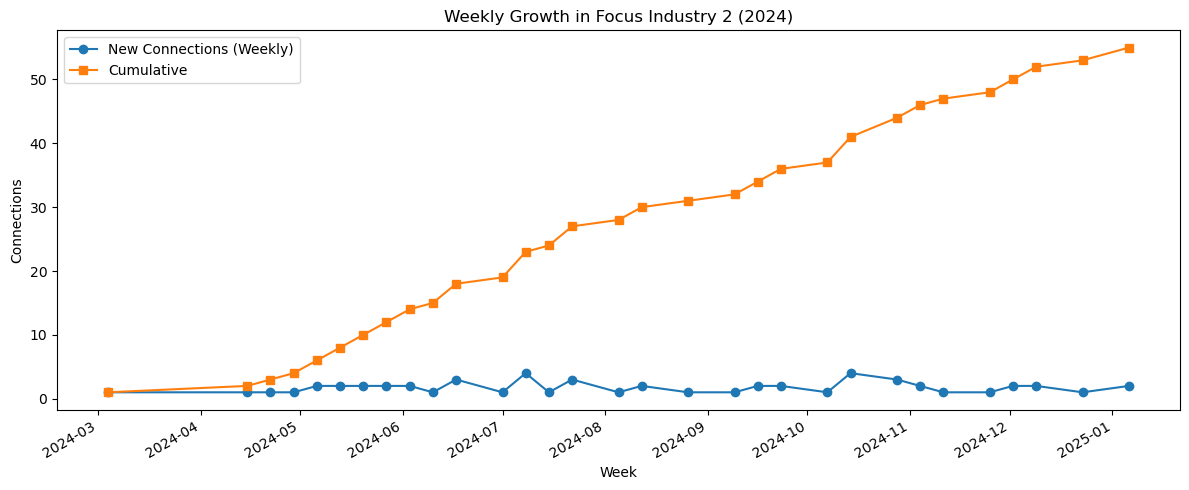

In [66]:
# Filter for Focus Industry 2
focus2 = df_recent[df_recent['Industry_Anon'] == 'Focus_Industry_2'].copy()
focus2['Week'] = focus2['Connected On'].dt.to_period('W').apply(lambda r: r.start_time)

# Weekly counts and cumulative
weekly_counts = focus2.groupby('Week').size()
cumulative_weekly = weekly_counts.cumsum()

# Plot
plt.figure(figsize=(12,5))
weekly_counts.plot(label='New Connections (Weekly)', marker='o')
cumulative_weekly.plot(label='Cumulative', marker='s')
plt.title('Weekly Growth in Focus Industry 2 (2024)')
plt.xlabel('Week')
plt.ylabel('Connections')
plt.legend()
plt.tight_layout()
plt.show()


In [68]:
focus2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 2 to 312
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Connected On            55 non-null     datetime64[ns]
 1   Company Employee Range  31 non-null     object        
 2   Location                55 non-null     object        
 3   Person_ID               55 non-null     object        
 4   Company_Anon            55 non-null     object        
 5   Industry_Anon           55 non-null     object        
 6   Function                55 non-null     object        
 7   Country                 55 non-null     object        
 8   YearMonth               55 non-null     period[M]     
 9   Country_Grouped         55 non-null     object        
 10  Week                    55 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(8), period[M](1)
memory usage: 5.2+ KB


Unique companies reached: 44
Company_Anon
Company_046    10
Company_259     2
Company_116     2
Company_163     1
Company_126     1
Company_060     1
Company_021     1
Company_409     1
Company_174     1
Company_196     1
Name: count, dtype: int64


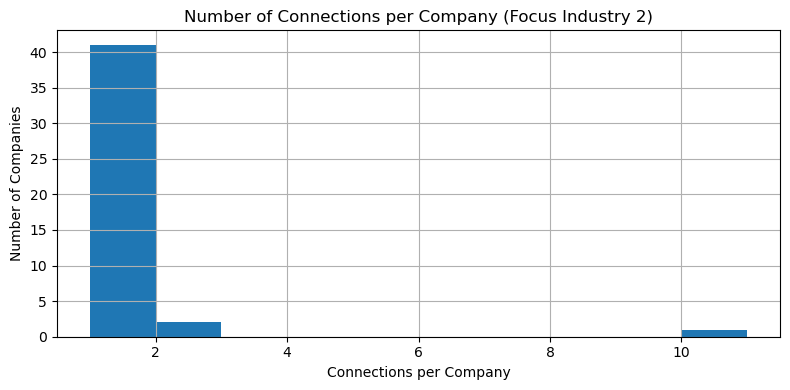

In [70]:
# Company penetration 
# Unique companies and contacts per company
companies = focus2['Company_Anon'].value_counts()
print('Unique companies reached:', companies.size)
print(companies.head(10))  # Top 10 companies

# How many people per company
company_contacts = focus2.groupby('Company_Anon').size()
company_contacts.hist(bins=range(1, company_contacts.max()+2), figsize=(8,4))
plt.title('Number of Connections per Company (Focus Industry 2)')
plt.xlabel('Connections per Company')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()


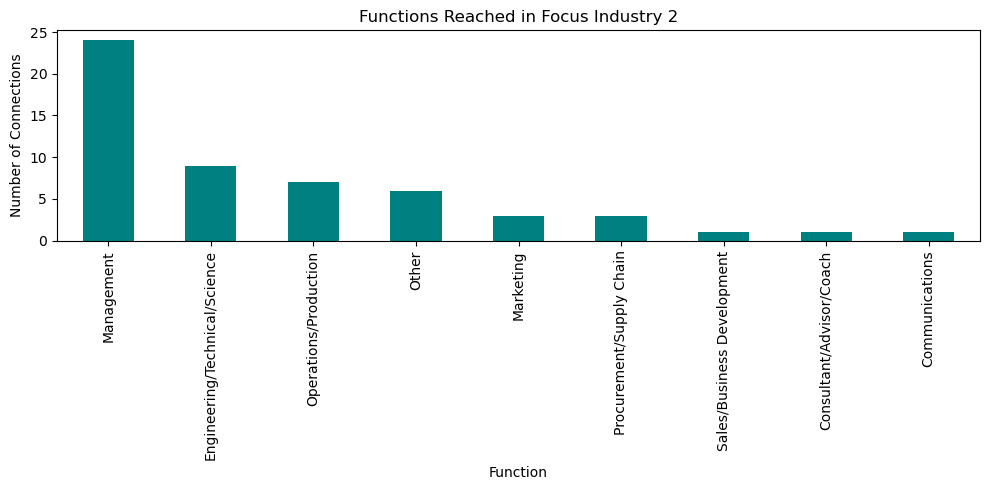

In [72]:
# Function breakdown
function_counts = focus2['Function'].value_counts()
function_counts.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Functions Reached in Focus Industry 2')
plt.xlabel('Function')
plt.ylabel('Number of Connections')
plt.tight_layout()
plt.show()

In [74]:
function_counts

Function
Management                       24
Engineering/Technical/Science     9
Operations/Production             7
Other                             6
Marketing                         3
Procurement/Supply Chain          3
Sales/Business Development        1
Consultant/Advisor/Coach          1
Communications                    1
Name: count, dtype: int64

In [96]:
#Company size analysis
# Define the category order
size_order = [
    '2 to 10',
    '11 to 50',
    '50 to 200',
    '201 to 500',
    '501 to 1000',
    '1001 to 5000',
    '5001 to 10000',
    '10001+',
    'unknown'
]
#Replace NaNs with 'unknown'
focus2['Company Employee Range'] = focus2['Company Employee Range'].fillna('unknown')

#Count and reindex
size_counts = focus2['Company Employee Range'].value_counts().reindex(size_order, fill_value=0)
size_counts


Company Employee Range
2 to 10           1
11 to 50          2
50 to 200         0
201 to 500        2
501 to 1000       1
1001 to 5000      7
5001 to 10000     8
10001+           10
unknown          24
Name: count, dtype: int64

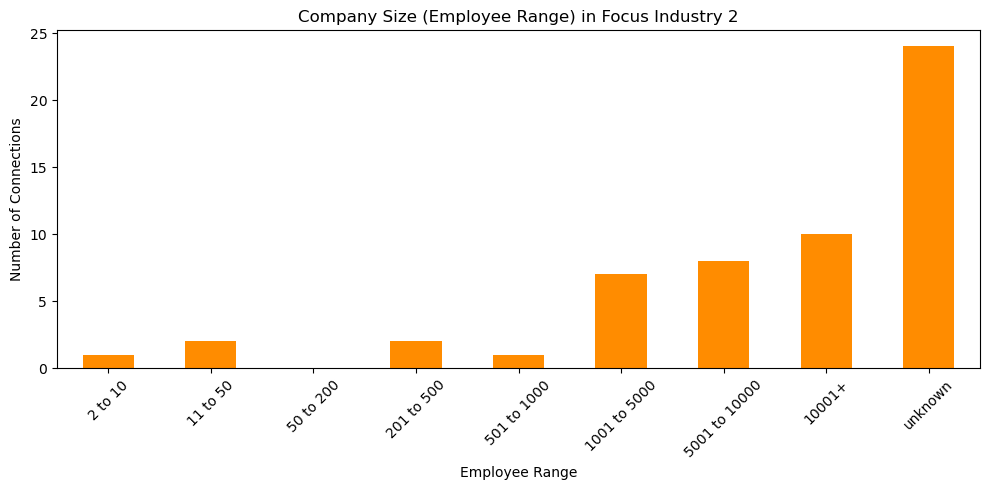

In [98]:
size_counts.plot(
    kind='bar',
    figsize=(10, 5),
    color='darkorange'
)
plt.title('Company Size (Employee Range) in Focus Industry 2')
plt.xlabel('Employee Range')
plt.ylabel('Number of Connections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [100]:
df_recent.head(10)

,Connected On,Company Employee Range,Location,Person_ID,Company_Anon,Industry_Anon,Function,Country,YearMonth,Country_Grouped
0,2025-01-16,201 to 500,"Houston, Texas, United States",Person_001,Company_255,Focus_Industry_1,Procurement/Supply Chain,United States,2025-01,United States
1,2025-01-13,5001 to 10000,Dallas-Fort Worth Metroplex,Person_002,Company_141,Industry_15,Management,United States,2025-01,United States
2,2025-01-12,NaN,"Swakopmund, Erongo Region, Namibia",Person_003,Company_163,Focus_Industry_2,Engineering/Technical/Science,Namibia,2025-01,Other
3,2025-01-10,NaN,"Houston, Texas, United States",Person_004,Freelance,Industry_14,Freelance,United States,2025-01,United States
4,2025-01-10,1001 to 5000,"Almaty, Kazakhstan",Person_005,Company_001,Industry_03,Management,Kazakhstan,2025-01,Kazakhstan
5,2025-01-09,NaN,"Stoughton, England, United Kingdom",Person_006,Company_074,Focus_Industry_3,Sales/Business Development,United Kingdom,2025-01,United Kingdom
6,2025-01-07,10001+,"Houston, Texas, United States",Person_007,Company_202,Focus_Industry_1,Procurement/Supply Chain,United States,2025-01,United States
7,2025-01-07,NaN,"City of Johannesburg, Gauteng, South Africa",Person_008,Company_269,Focus_Industry_2,Sales/Business Development,South Africa,2025-01,South Africa
8,2025-01-04,NaN,Mozambique,Person_009,Company_244,Industry_14,Management,Mozambique,2025-01,Other
9,2024-12-27,NaN,Tanzania,Person_010,Company_286,Focus_Industry_2,Consultant/Advisor/Coach,Tanzania,2024-12,Tanzania


In [102]:
country_counts_focus2 = focus2['Country'].value_counts()
print(country_counts_focus2.head(10))  # Top 10 countries for Focus Industry 2


Country
Zambia                              13
Tanzania                             7
South Africa                         7
United States                        6
Ghana                                4
Australia                            3
Democratic Republic of the Congo     3
Zimbabwe                             3
Sierra Leone                         1
Bolivia                              1
Name: count, dtype: int64


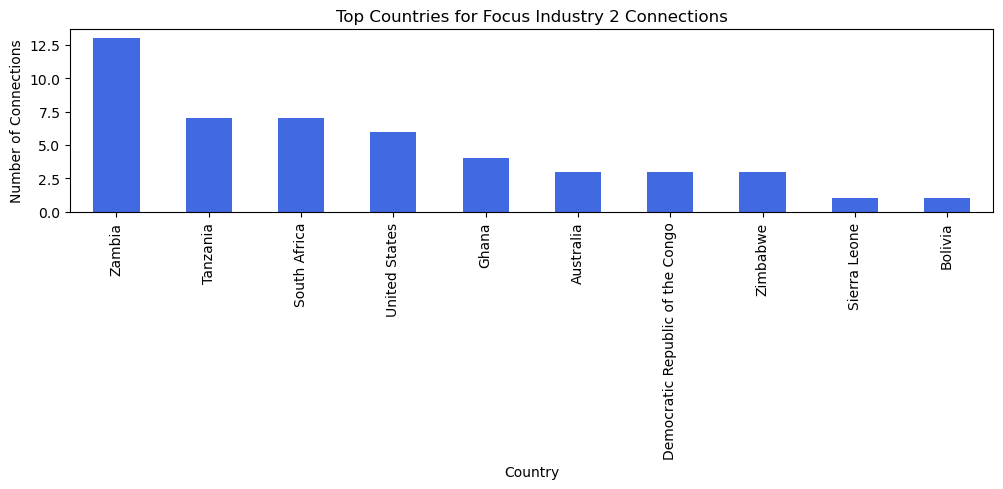

In [104]:
import matplotlib.pyplot as plt

top_countries_focus2 = country_counts_focus2.head(10)  # adjust if you want more/less

top_countries_focus2.plot(
    kind='bar',
    figsize=(10, 5),
    color='royalblue'
)
plt.title('Top Countries for Focus Industry 2 Connections')
plt.xlabel('Country')
plt.ylabel('Number of Connections')
plt.tight_layout()
plt.show()


In [124]:
# Filter all connections in Focus Industry 3
focus3 = df[df['Industry_Anon'] == 'Focus_Industry_3'].copy()

# For 2024 growth only
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2025-01-01')
focus3_2024 = focus3[(focus3['Connected On'] >= start_date) & (focus3['Connected On'] < end_date)].copy()
print('Connections in Focus Industry 3:',focus3.shape[0])
print('Connections acquired in 2024:',focus3_2024.shape[0])

Connections in Focus Industry 3: 16
Connections acquired in 2024: 5


Company breakdown (all time):
Company_Anon
Company_074    1
Company_118    1
Company_027    1
Company_393    1
Company_049    1
Company_296    1
Company_233    1
Company_036    1
Company_047    1
Company_071    1
Company_188    1
Company_076    1
Company_431    1
Freelance      1
Company_332    1
Company_189    1
Name: count, dtype: int64

Company breakdown (2024):
Company_Anon
Company_118    1
Company_027    1
Company_393    1
Company_049    1
Company_296    1
Name: count, dtype: int64


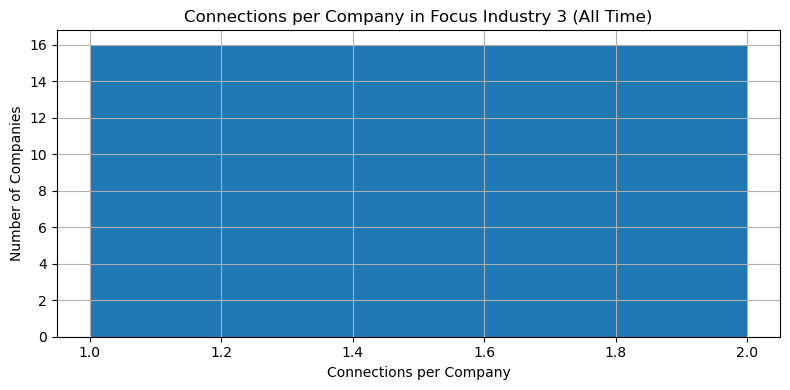

In [110]:
# Company Breakdown
# All-time (existing connections)
print("Company breakdown (all time):")
print(focus3['Company_Anon'].value_counts())

# 2024 growth
print("\nCompany breakdown (2024):")
print(focus3_2024['Company_Anon'].value_counts())

# Histogram: connections per company (all time)
focus3.groupby('Company_Anon').size().hist(
    bins=range(1, focus3['Company_Anon'].value_counts().max()+2),
    figsize=(8,4)
)
plt.title('Connections per Company in Focus Industry 3 (All Time)')
plt.xlabel('Connections per Company')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()



Country breakdown (all time):
Country
United States     5
United Kingdom    3
Russia            2
Argentina         1
Finland           1
Israel            1
Germany           1
Denmark           1
Switzerland       1
Name: count, dtype: int64

Country breakdown (2024):
Country
United Kingdom    2
United States     1
Argentina         1
Finland           1
Name: count, dtype: int64


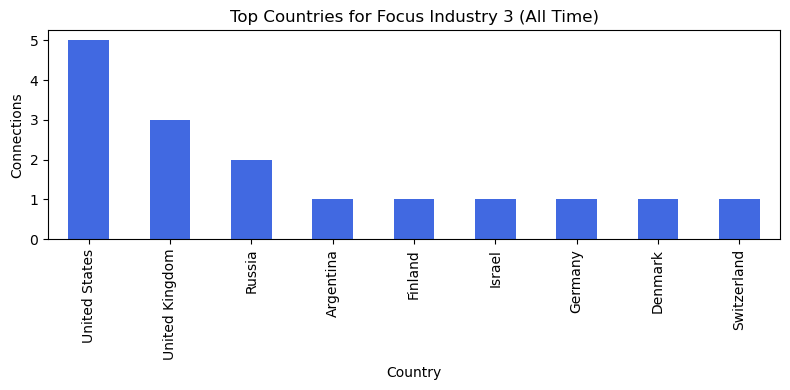

In [112]:
#Geography Breakdown
# Country counts (all time and 2024)
print("\nCountry breakdown (all time):")
print(focus3['Country'].value_counts())

print("\nCountry breakdown (2024):")
print(focus3_2024['Country'].value_counts())

# Bar plot for top countries (all time)
focus3['Country'].value_counts().head(10).plot(
    kind='bar', figsize=(8,4), color='royalblue'
)
plt.title('Top Countries for Focus Industry 3 (All Time)')
plt.xlabel('Country')
plt.ylabel('Connections')
plt.tight_layout()
plt.show()



Function breakdown (all time):
Function
Other                         6
Management                    5
Sales/Business Development    2
Marketing                     2
Freelance                     1
Name: count, dtype: int64

Function breakdown (2024):
Function
Management                    2
Marketing                     1
Sales/Business Development    1
Other                         1
Name: count, dtype: int64


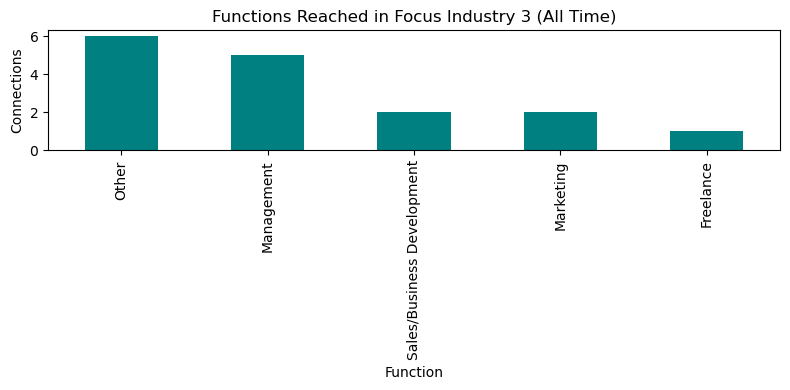

In [114]:
#Function Breakdown
# Function counts (all time and 2024)
print("\nFunction breakdown (all time):")
print(focus3['Function'].value_counts())

print("\nFunction breakdown (2024):")
print(focus3_2024['Function'].value_counts())

# Bar plot for functions (all time)
focus3['Function'].value_counts().plot(
    kind='bar', figsize=(8,4), color='teal'
)
plt.title('Functions Reached in Focus Industry 3 (All Time)')
plt.xlabel('Function')
plt.ylabel('Connections')
plt.tight_layout()
plt.show()


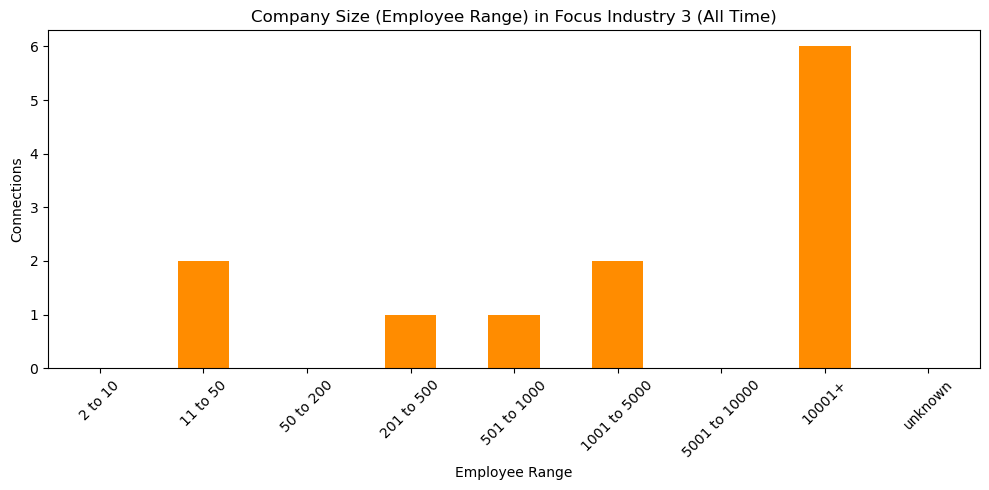

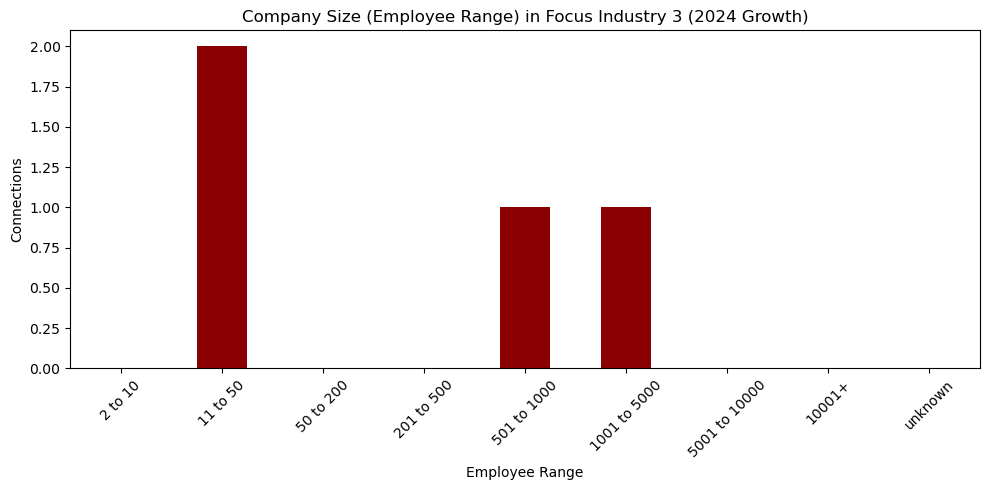

In [116]:
# Company Size Breakdown

# Define the category order
size_order = [
    '2 to 10',
    '11 to 50',
    '50 to 200',
    '201 to 500',
    '501 to 1000',
    '1001 to 5000',
    '5001 to 10000',
    '10001+',
    'unknown'
]
#Replace NaNs with 'unknown'
focus2['Company Employee Range'] = focus2['Company Employee Range'].fillna('unknown')

# All time
size_counts_all = focus3['Company Employee Range'].value_counts().reindex(size_order, fill_value=0)
size_counts_all.plot(kind='bar', figsize=(10, 5), color='darkorange')
plt.title('Company Size (Employee Range) in Focus Industry 3 (All Time)')
plt.xlabel('Employee Range')
plt.ylabel('Connections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2024 only
size_counts_2024 = focus3_2024['Company Employee Range'].value_counts().reindex(size_order, fill_value=0)
size_counts_2024.plot(kind='bar', figsize=(10, 5), color='darkred')
plt.title('Company Size (Employee Range) in Focus Industry 3 (2024 Growth)')
plt.xlabel('Employee Range')
plt.ylabel('Connections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Unique companies reached: 54
Company_Anon
Company_046    10
Company_127     2
Company_259     2
Company_116     2
Company_163     1
Company_193     1
Company_241     1
Company_148     1
Company_126     1
Company_030     1
Name: count, dtype: int64


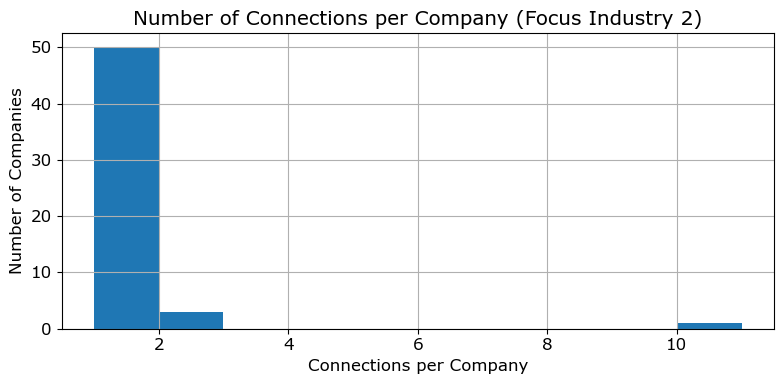

In [164]:
# Company penetration 
# Unique companies and contacts per company
focus2_all = df[df['Industry_Anon'] == 'Focus_Industry_2'].copy()
companies = focus2_all['Company_Anon'].value_counts()
print('Unique companies reached:', companies.size)
print(companies.head(10))  # Top 10 companies

# How many people per company
company_contacts = focus2_all.groupby('Company_Anon').size()
company_contacts.hist(bins=range(1, company_contacts.max()+2), figsize=(8,4))
plt.title('Number of Connections per Company (Focus Industry 2)')
plt.xlabel('Connections per Company')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()
